# Absenteeism at work Data Set

Data Set Information:

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.




Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset
df=pd.read_csv("Absenteeism_at_work.csv",sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


(740, 21)

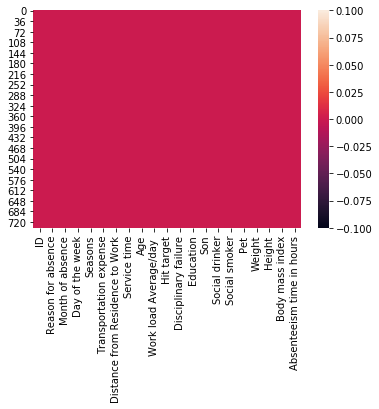

In [3]:
# Let's check for Null Values and also look at the shape
sns.heatmap(df.isnull())
df.shape
# The dataset doesn't have any null values

In [4]:
# Let's find out the mean of our target variable 'Absenteeism time in hours'
df['Absenteeism time in hours'].mean()
# On an average 6.92 hours of absenteeism is found

6.924324324324324

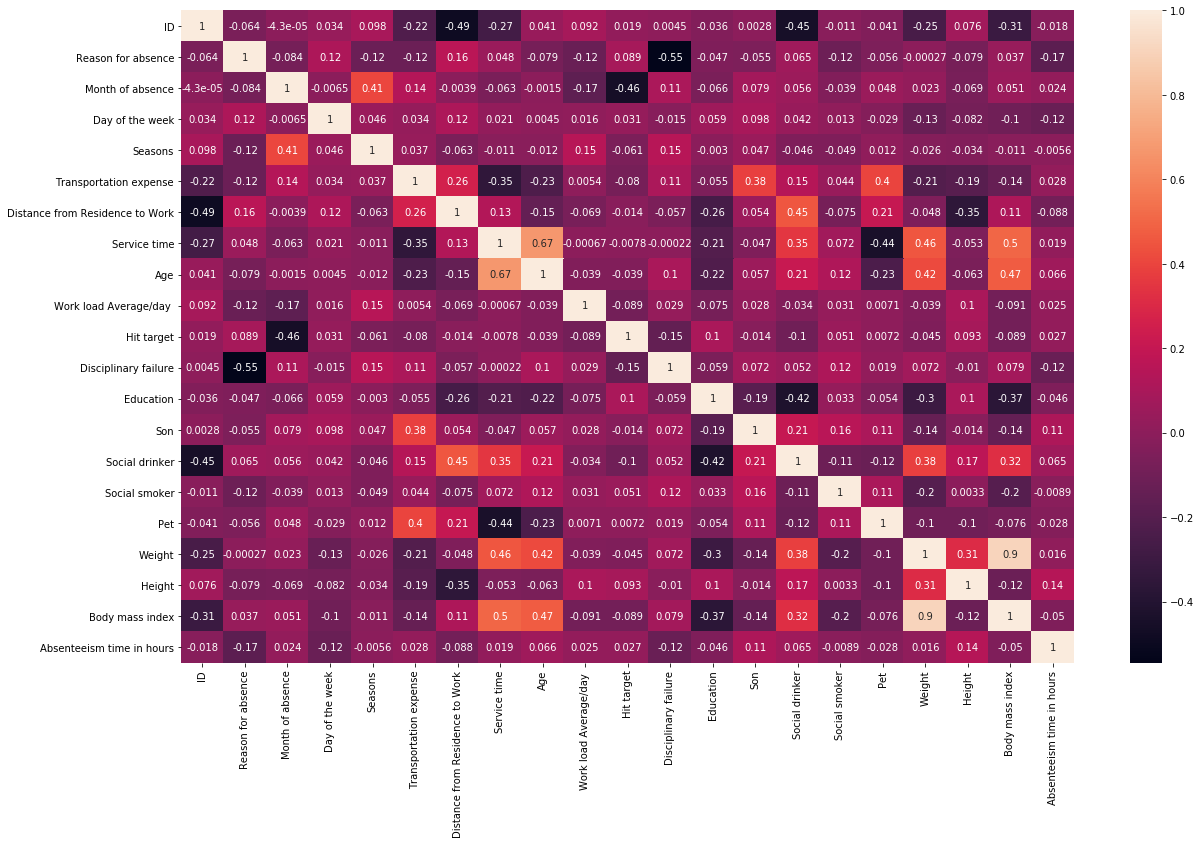

In [5]:
# Let's have a look at the correlation plot as we have a ot of features. Let's see if we can eliminate a few
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


# Features to drop
1. Weight and Height can be removed as we have BMI. 
BMI=Weight/Height**2

In [7]:
# Looks like all features are numerical. Let's confirm
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [8]:
# Alsp, looks like 'ID' is not unique for each. Checking ID
df['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [9]:
# Droping Height and Weight
df.drop(columns=['Height','Weight'],axis=1,inplace=True)

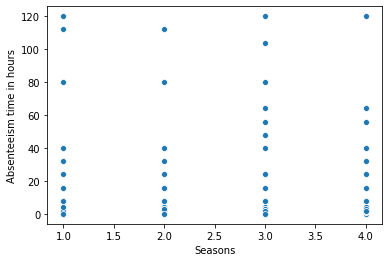

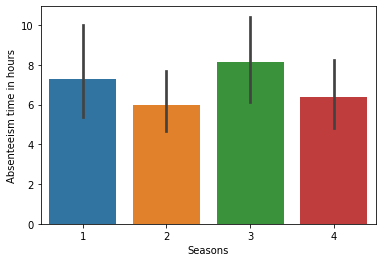

In [10]:
# Let's plot some of the features agaignst target
sns.scatterplot(y='Absenteeism time in hours',x='Seasons',data=df)
plt.show()
# There seems to be 4 seasons. Let's check the barplot
sns.barplot(y='Absenteeism time in hours',x='Seasons',data=df)
# 1st and 3rd seasons have max absenteeism

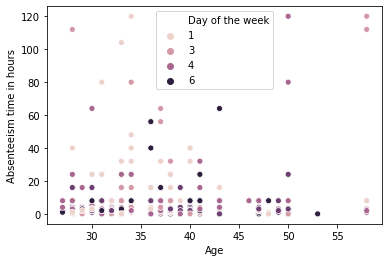

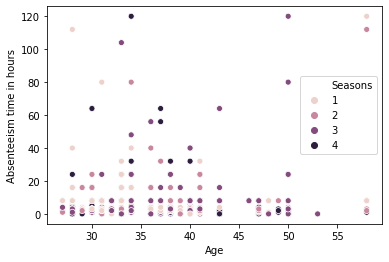

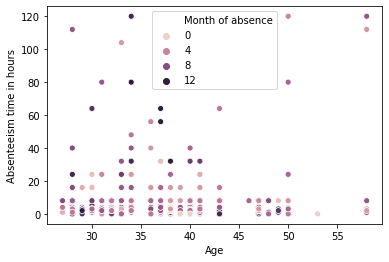

In [11]:
# Checking Age vs Absense hued with Day
sns.scatterplot(x='Age',y='Absenteeism time in hours',data=df,hue='Day of the week')
plt.show()
# Checking Age vs Absense hued with Season
sns.scatterplot(x='Age',y='Absenteeism time in hours',data=df,hue='Seasons')
plt.show()
# Checking Age vs Absense hued with Month of absence
sns.scatterplot(x='Age',y='Absenteeism time in hours',data=df,hue='Month of absence')
plt.show()

# Looks like Day of week is also important

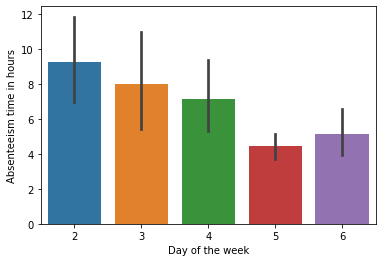

In [12]:
sns.barplot(x='Day of the week',y='Absenteeism time in hours',data=df)
# Max absenteeism is in 2 which is the first day of the week maybe indication Monday.

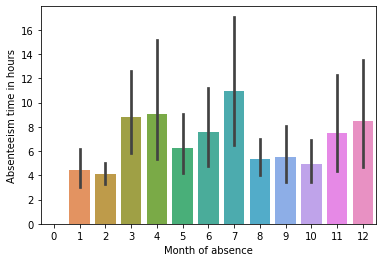

In [13]:
sns.barplot(x='Month of absence',y='Absenteeism time in hours',data=df)
# Max absenteeism is in 7 which is the July

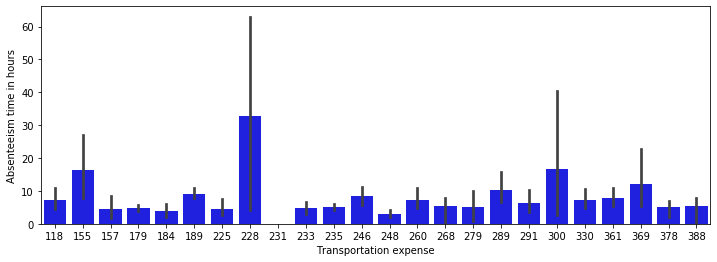

In [14]:
# Let's have a look at Transportation expense
plt.figure(figsize=(12,4))
sns.barplot(x='Transportation expense',y='Absenteeism time in hours',data=df,color='blue')
#Absenteeism time is max for Expense = 228

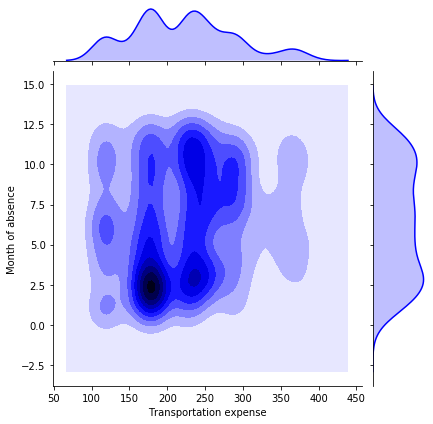

In [15]:
# Let's see how Expenses vary with Seasons
sns.jointplot(x='Transportation expense',y='Month of absence',data=df,color='blue',kind='kde')

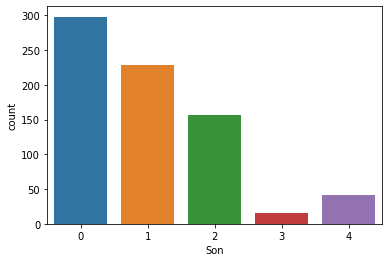

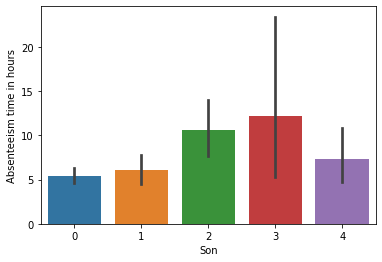

In [16]:
sns.countplot(df['Son'])
plt.show()
sns.barplot(df['Son'],df['Absenteeism time in hours'])

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

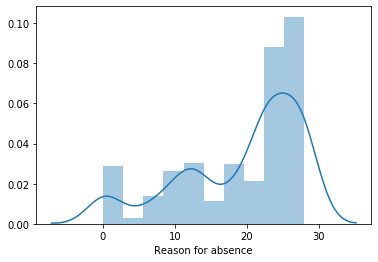

In [17]:
# Reasons
sns.distplot(df['Reason for absence'])
df['Reason for absence'].value_counts()

In [18]:
# top 3 reasons are: 23 -medical consultation     28 - dental consultation   & 27 - physiotherapy
#43 have never been absent

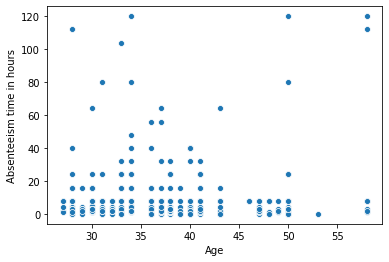

In [19]:
# Let's bin the 'Age' feature
sns.scatterplot(x='Age',y='Absenteeism time in hours',data=df)

In [20]:
df.Age.min(),df.Age.max()

(27, 58)

In [21]:
# Let's bin the 'Age' feature
bins = [25, 35, 45,100]
df['Age_bin'] = pd.cut(df['Age'], bins)
df.drop('Age',axis=1,inplace=True)

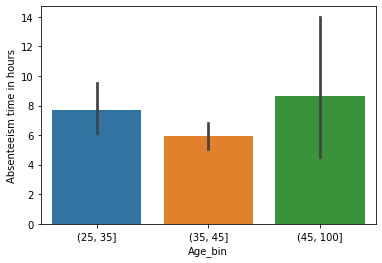

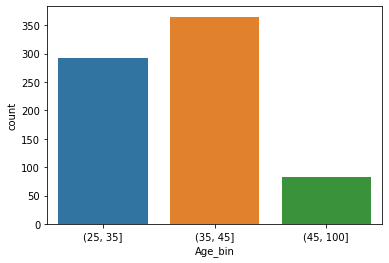

In [22]:
sns.barplot(x='Age_bin',y='Absenteeism time in hours',data=df)
plt.show()
sns.countplot(df['Age_bin'])
df['Age_bin']=df['Age_bin'].astype(str)
# Interesting to note that those above 55 are minimum in count, but have the max Absenteeism average

In [23]:
# Let's bin the 'Transportation expense' feature
bins = [100,200,300,400]
df['Transportation_bin'] = pd.cut(df['Transportation expense'], bins)
df.drop('Transportation expense',axis=1,inplace=True)

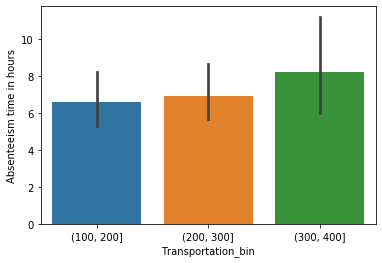

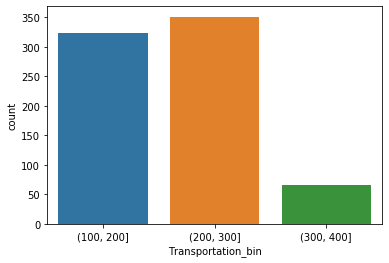

In [24]:
sns.barplot(x='Transportation_bin',y='Absenteeism time in hours',data=df)
plt.show()
sns.countplot(df['Transportation_bin'])
df['Transportation_bin']=df['Transportation_bin'].astype(str)
# # Interesting to note that those within 300-400 are min in count, but have the max Absenteeism average

In [25]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Distance from Residence to Work', 'Service time',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Body mass index', 'Absenteeism time in hours', 'Age_bin',
       'Transportation_bin'],
      dtype='object')

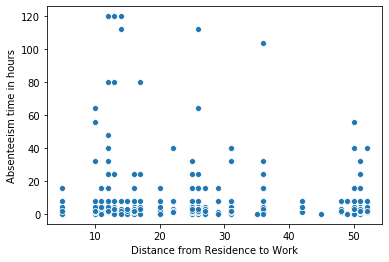

In [26]:
# Let's bin the 'Distance from Residence to Work' feature
sns.scatterplot(x='Distance from Residence to Work',y='Absenteeism time in hours',data=df)

In [27]:
bins = [0,20,40,60]
df['Distance_bin'] = pd.cut(df['Distance from Residence to Work'], bins)
df.drop('Distance from Residence to Work',axis=1,inplace=True)

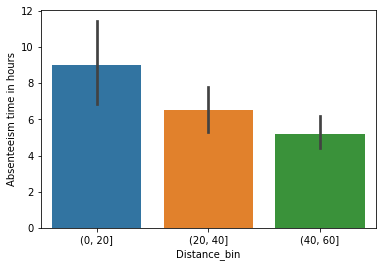

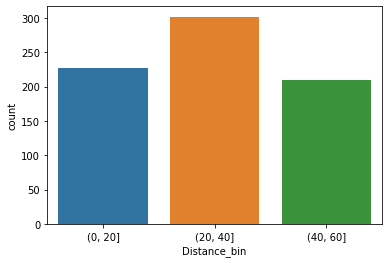

In [28]:
sns.barplot(x='Distance_bin',y='Absenteeism time in hours',data=df)
plt.show()
sns.countplot(df['Distance_bin'])
df['Distance_bin']=df['Distance_bin'].astype(str)
# Those with less distance are more absent

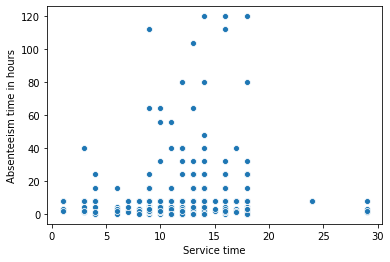

In [29]:
sns.scatterplot(x='Service time',y='Absenteeism time in hours',data=df)
    

In [30]:
# Let's bin the 'Service time' feature
bins = [0, 5, 10,15,30]
df['service_time_bin'] = pd.cut(df['Service time'], bins)
df.drop('Service time',axis=1,inplace=True)

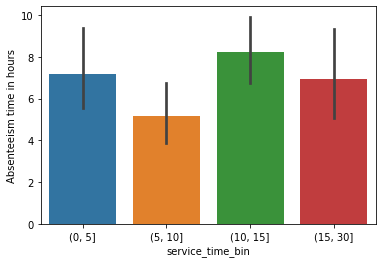

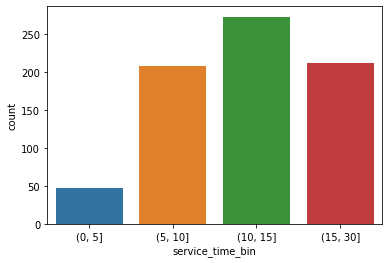

In [31]:
sns.barplot(x='service_time_bin',y='Absenteeism time in hours',data=df)
plt.show()
sns.countplot(df['service_time_bin'])
df['service_time_bin']=df['service_time_bin'].astype(str)
# Those with less distance are more absent

In [32]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index', 'Absenteeism time in hours',
       'Age_bin', 'Transportation_bin', 'Distance_bin', 'service_time_bin'],
      dtype='object')

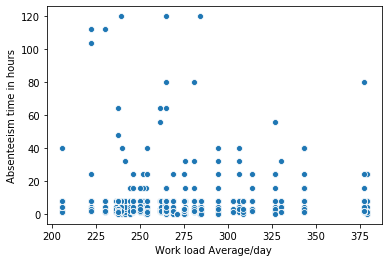

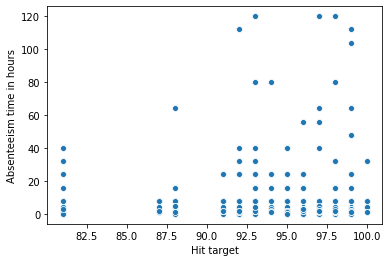

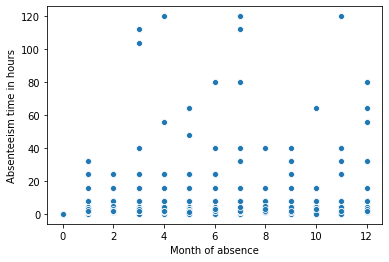

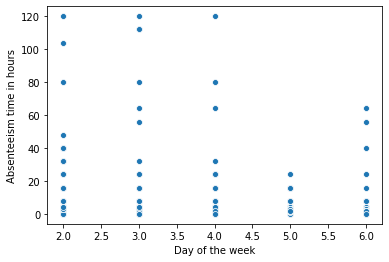

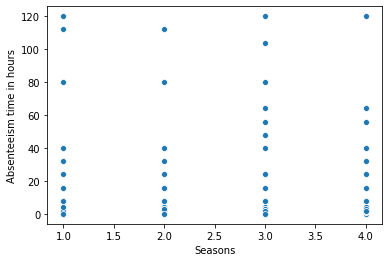

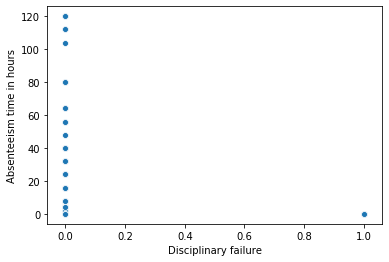

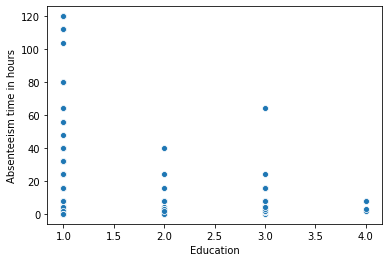

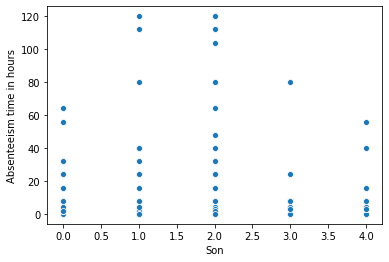

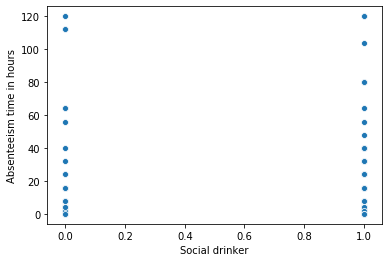

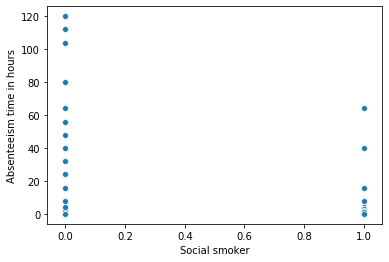

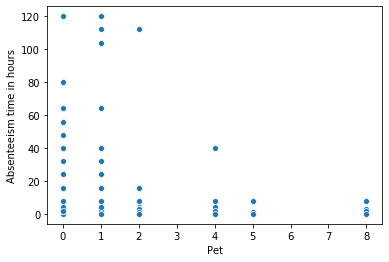

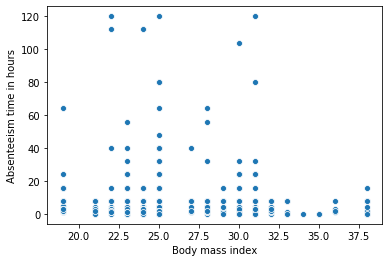

In [33]:
cols_rem=['Work load Average/day ', 'Hit target','Month of absence', 'Day of the week',
       'Seasons','Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Body mass index']
for i in cols_rem:
    sns.scatterplot(i,'Absenteeism time in hours',data=df)
    plt.show()
# Plotting the remaining rows to see if we find any other insight

In [36]:
df.dtypes
labe=['Age_bin','Transportation_bin','Distance_bin','service_time_bin']
# Let's now Label Encode labe for further analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[labe] = df[labe].apply(LabelEncoder().fit_transform)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Age_bin,Transportation_bin,Distance_bin,service_time_bin
0,11,26,7,3,1,239.554,97,0,1,2,1,0,1,30,4,0,1,1,1
1,36,0,7,3,1,239.554,97,1,1,1,1,0,0,31,0,2,0,0,2
2,3,23,7,4,1,239.554,97,0,1,0,1,0,0,31,2,1,0,2,2
3,7,7,7,5,1,239.554,97,0,1,2,1,1,0,24,4,1,1,0,1
4,11,23,7,5,1,239.554,97,0,1,2,1,0,1,30,2,0,1,1,1


In [37]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Age_bin,Transportation_bin,Distance_bin,service_time_bin
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,26.677027,6.924324,0.717568,0.652703,0.975676,1.785135
std,11.021247,8.433406,3.436287,1.421675,1.111831,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,4.285452,13.330998,0.653886,0.636874,0.769481,0.926848
min,1.000000,0.000000,0.000000,2.000000,1.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,3.000000,1.000000,1.000000,1.000000,2.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,31.000000,8.000000,1.000000,1.000000,2.000000,3.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,38.000000,120.000000,2.000000,2.000000,2.000000,3.000000


In [38]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Age_bin,Transportation_bin,Distance_bin,service_time_bin
0,11,26,7,3,1,239.554,97,0,1,2,1,0,1,30,4,0,1,1,1
1,36,0,7,3,1,239.554,97,1,1,1,1,0,0,31,0,2,0,0,2
2,3,23,7,4,1,239.554,97,0,1,0,1,0,0,31,2,1,0,2,2
3,7,7,7,5,1,239.554,97,0,1,2,1,1,0,24,4,1,1,0,1
4,11,23,7,5,1,239.554,97,0,1,2,1,0,1,30,2,0,1,1,1


In [39]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Absenteeism time in hours"])
y=df[["Absenteeism time in hours"]]

In [40]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Age_bin,Transportation_bin,Distance_bin,service_time_bin
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.775932,-1.098132,0.545684,0.031633,-0.847675
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.009438,1.962575,-1.025547,-1.268824,0.231980
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,1.009438,0.432222,-1.025547,1.332090,0.231980
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.625100,0.432222,0.545684,-1.268824,-0.847675
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.775932,-1.098132,0.545684,0.031633,-0.847675


# Modelling

In [42]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [43]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [44]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  86  is  0.2530179222517125


In [45]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 50}

In [47]:
rfr=RandomForestRegressor(n_estimators=50)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  97  is  0.24574564997420278


In [48]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 13}

In [51]:
knr=KNeighborsRegressor(n_neighbors=13)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  88  is  0.24538867746147797


In [50]:
# SVM

from sklearn.svm import SVR
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [52]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  94  is  0.38256107675876805


In [53]:
# Cross Validation

print("\n\nRandomForestRegressor\n\n")
model_evaluation(rfr,x,y)

print("\n\nLinearRegression\n\n")
model_evaluation(lr,x,y)

print("\n\nSupport Vector Regressor\n\n")
model_evaluation(svr,x,y)

print("\n\nKNNRegressor\n\n")
model_evaluation(knr,x,y)




RandomForestRegressor


Mean r2 score for regressor:  -0.1605544062354235
standard deviation in r2 score for regressor:  0.2889867599595542
[-0.73223021 -0.05104278 -0.07193368  0.05008918  0.00234546]


LinearRegression


Mean r2 score for regressor:  0.05984376163926199
standard deviation in r2 score for regressor:  0.039473788315845006
[ 0.09683173 -0.01512382  0.08650387  0.06923345  0.06177358]


Support Vector Regressor


Mean r2 score for regressor:  0.06956484517631303
standard deviation in r2 score for regressor:  0.05224936249928164
[ 0.14179818 -0.02134076  0.07891639  0.06988892  0.0785615 ]


KNNRegressor


Mean r2 score for regressor:  0.055371231900634685
standard deviation in r2 score for regressor:  0.039716110507723876
[ 0.08920706 -0.01599051  0.05625625  0.05158483  0.09579853]


# Let's Convert Label to Classification Problem instead of regression as model isn't performing well.

In [80]:
bins = [-1, 5, 10, np.inf]
names = ['Late', 'Very_Late', 'Extremely_Late']
df['abs_bin'] = pd.cut(df['Absenteeism time in hours'], bins, labels=names)

In [81]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours,Age_bin,Transportation_bin,Distance_bin,service_time_bin,abs_bin
0,11,26,7,3,1,239.554,97,0,1,2,1,0,1,30,4,0,1,1,1,Late
1,36,0,7,3,1,239.554,97,1,1,1,1,0,0,31,0,2,0,0,2,Late
2,3,23,7,4,1,239.554,97,0,1,0,1,0,0,31,2,1,0,2,2,Late
3,7,7,7,5,1,239.554,97,0,1,2,1,1,0,24,4,1,1,0,1,Late
4,11,23,7,5,1,239.554,97,0,1,2,1,0,1,30,2,0,1,1,1,Late


In [125]:
# Let's Separate our dataset into Features and target
df_x=df.drop(columns=["Absenteeism time in hours","abs_bin"])
y=df[["abs_bin"]]

In [126]:
# Let's do Standard Scaling on the Continous variables (x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Age_bin,Transportation_bin,Distance_bin,service_time_bin
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.775932,-1.098132,0.545684,0.031633,-0.847675
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.009438,1.962575,-1.025547,-1.268824,0.231980
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,1.009438,0.432222,-1.025547,1.332090,0.231980
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.625100,0.432222,0.545684,-1.268824,-0.847675
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.775932,-1.098132,0.545684,0.031633,-0.847675


In [110]:
# For Multi-Class Classification let's focus on 'f1_micro' score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def f1(clf,df_x,y):
    max_f1_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        f1_scr=f1_score(y_test,y_pred,average='micro')
        if f1_scr>max_f1_score:
            max_f1_score=f1_scr
            final_r_state=r_state
    print("max f1 score corresponding to ",final_r_state," is ",max_f1_score)
    return final_r_state

In [109]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring='f1_micro')
    print("Mean f1 score for classifier: ",c_scores.mean())
    print("standard deviation in f1 score for classifier: ",c_scores.std())
    print(c_scores)

In [111]:
x.shape

(740, 18)

In [112]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters = {"n_estimators":[10,50,100,150,200,250,500]}
clf = GridSearchCV(rfc, parameters, cv=5,scoring="f1_micro")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 200}

In [113]:
rfc=RandomForestClassifier(n_estimators=200)
r_state=f1(rfc,x,y)

max f1 score corresponding to  47  is  0.8310810810810809


In [114]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = {"n_neighbors":range(2,20)}
clf = GridSearchCV(knn, parameters, cv=5,scoring="f1_micro")
clf.fit(x, y)
clf.best_params_

{'n_neighbors': 8}

In [115]:
# Taking odd\
knn=KNeighborsClassifier(n_neighbors=9)
r_state=f1(knn,x,y)

max f1 score corresponding to  47  is  0.7635135135135135


In [116]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
parameters = {"criterion":["gini", "entropy"]}
clf = GridSearchCV(dc, parameters, cv=5,scoring="f1_micro")
clf.fit(x, y)
clf.best_params_

{'criterion': 'gini'}

In [117]:
dc=DecisionTreeClassifier(criterion="gini")
r_state=f1(dc,x,y)

max f1 score corresponding to  45  is  0.7567567567567567


In [118]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1_micro")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [119]:
svc=SVC(kernel="linear",C=0.1,probability=True)
r_state=f1(svc,x,y)

max f1 score corresponding to  52  is  0.7837837837837838


In [120]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
r_state=f1(lg,x,y)

max f1 score corresponding to  63  is  0.7635135135135135


In [121]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
r_state=f1(gnb,x,y)

max f1 score corresponding to  99  is  0.38513513513513514


In [122]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
r_state=f1(gb,x,y)

max f1 score corresponding to  82  is  0.8175675675675675


In [123]:
# Cross Validation

print("\n\nRandom Forest Classifier\n\n")
model_evaluation(rfc,x,y)

print("\n\nKNN Classifier\n\n")
model_evaluation(knn,x,y)

print("\n\nSVM Classifier\n\n")
model_evaluation(svc,x,y)

print("\n\nDecisionTree Classifier\n\n")
model_evaluation(dc,x,y)

print("\n\nLogistic Regression Classifier\n\n")
model_evaluation(lg,x,y)

print("\n\nGaussian NB Classifier\n\n")
model_evaluation(gnb,x,y)

print("\n\nGradient Boost\n\n")
model_evaluation(gb,x,y)




Random Forest Classifier


Mean f1 score for classifier:  0.7027027027027027
standard deviation in f1 score for classifier:  0.04602536855655783
[0.78378378 0.64864865 0.68918919 0.67567568 0.71621622]


KNN Classifier


Mean f1 score for classifier:  0.6959459459459459
standard deviation in f1 score for classifier:  0.023012684278278926
[0.72297297 0.70945946 0.70945946 0.66216216 0.67567568]


SVM Classifier


Mean f1 score for classifier:  0.7189189189189189
standard deviation in f1 score for classifier:  0.019860727644187903
[0.73648649 0.69594595 0.69594595 0.74324324 0.72297297]


DecisionTree Classifier


Mean f1 score for classifier:  0.6716216216216215
standard deviation in f1 score for classifier:  0.05710958543004173
[0.77027027 0.61486486 0.62162162 0.69594595 0.65540541]


Logistic Regression Classifier


Mean f1 score for classifier:  0.6851351351351351
standard deviation in f1 score for classifier:  0.03157654444742682
[0.73648649 0.64864865 0.65540541 0.68918919 0.695

# Random Forest Classifier works best

In [130]:
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 47,test_size=0.20,stratify=y)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred,average='micro'))
print(y_pred)

Confusion matrix 
 [[ 1  2  9]
 [ 3 90  1]
 [ 0 11 31]]
classification report 
                 precision    recall  f1-score   support

Extremely_Late       0.25      0.08      0.12        12
          Late       0.87      0.96      0.91        94
     Very_Late       0.76      0.74      0.75        42

      accuracy                           0.82       148
     macro avg       0.63      0.59      0.60       148
  weighted avg       0.79      0.82      0.80       148

F1 Score: 0.8243243243243243
['Very_Late' 'Late' 'Late' 'Late' 'Late' 'Late' 'Very_Late' 'Late' 'Late'
 'Late' 'Late' 'Late' 'Late' 'Very_Late' 'Late' 'Late' 'Late' 'Late'
 'Late' 'Very_Late' 'Very_Late' 'Late' 'Late' 'Late' 'Late' 'Very_Late'
 'Late' 'Very_Late' 'Late' 'Very_Late' 'Late' 'Late' 'Very_Late'
 'Very_Late' 'Late' 'Late' 'Late' 'Very_Late' 'Very_Late' 'Very_Late'
 'Late' 'Late' 'Late' 'Late' 'Very_Late' 'Late' 'Late' 'Late' 'Late'
 'Very_Late' 'Very_Late' 'Very_Late' 'Late' 'Very_Late' 'Very_Late' 'Late'
 '